## In this notebook I create a video of the results

In [1]:
path = '/home/naji/Desktop/fastai_final_project/datasets/Udacity_Sample_Dataset/tiny_sample/'

### Annotating an image

* This code needs "udacity" conda env.
* python                    3.9.0 
* pillow                    8.2.0
* moviepy                   1.0.3
* opencv-python             4.5.2.54

In [6]:
import cv2
from PIL import Image
from matplotlib import pyplot as plt
import pandas as pd

In [7]:
df = pd.read_csv(path + 'test/results.csv')
df

,filename,predict_angle,actual_angle
0,1479425732431519171.jpg,0.030468,1
1,1479425732631576609.jpg,0.979642,11
2,1479425732581601200.jpg,1.238121,111
3,1479425732531508356.jpg,0.437563,1111
4,1479425732731601652.jpg,0.668497,11111
5,1479425732681578448.jpg,1.547441,1111
6,1479425732481585355.jpg,0.022233,1


In [8]:
files = df['filename'].to_list()
actual_ang = df['actual_angle'].to_list()
pred_ang = df['predict_angle'].to_list()

In [9]:
images = [cv2.imread(path + 'test/' + f) for f in files]

In [10]:
def write_on_image(img, ac_ang, pred_ang):
    cv2.putText(img, 'Actual:' + str(ac_ang) + '   Predicted:' + str(pred_ang), 
                (50, 50), cv2.FONT_HERSHEY_SIMPLEX, 0.75, (255, 0, 0), 2, cv2.LINE_AA)

In [11]:
_ = [write_on_image(f[0], f[1], f[2]) for f in list(zip(images, actual_ang, pred_ang))]

In [12]:
for idx, img in enumerate(images) :
    cv2.imwrite(path +'anotated/'+ str(idx) + '.jpg', img)

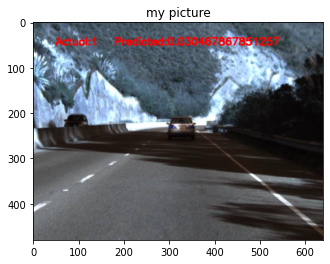

In [13]:
plt.imshow(images[0])
plt.title('my picture')
plt.show()

### Creating a video

* This code needs "udacity-sim" conda env.
* python                    3.9.5 
* moviepy                   1.0.3
* decorator                 4.4.2 
* numpy                     1.19.5 

In [2]:
from moviepy.editor import *
import glob

In [3]:
files = glob.glob(path + 'anotated/*.jpg')

In [4]:
clip = ImageSequenceClip(files, fps = 5)

In [6]:
clip.ipython_display(width = 360, fps = 5) 

Moviepy - Building video __temp__.mp4.
Moviepy - Writing video __temp__.mp4



TypeError: must be real number, not NoneType

In [20]:
clip.write_videofile(path + 'anotated/anotated.mp4')

Moviepy - Building video /home/naji/Desktop/fastai_final_project/datasets/Udacity_Sample_Dataset/tiny_sample/anotated/anotated.mp4.
Moviepy - Writing video /home/naji/Desktop/fastai_final_project/datasets/Udacity_Sample_Dataset/tiny_sample/anotated/anotated.mp4

Moviepy - Done !
Moviepy - video ready /home/naji/Desktop/fastai_final_project/datasets/Udacity_Sample_Dataset/tiny_sample/anotated/anotated.mp4
